# Problem Statement
Create an “Academic performance” dataset of students and perform the following operations using Python.
1. Scan all variables for missing values and inconsistencies. If there are missing values and/or inconsistencies, use any of the suitable techniques to deal with them.
2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable techniques to deal with them.
3. Apply data transformations on at least one of the variables. The purpose of this transformation should be one of the following reasons: to change the scale for better understanding of the variable, to convert a non-linear relation into a linear one, or to decrease the skewness and convert the distribution into a normal distribution.


In [186]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [187]:
df = pd.read_csv("StudentsPerformance.csv")

In [188]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72.0,74.0
1,female,group C,some college,standard,completed,69,90.0,88.0
2,female,group B,master's degree,standard,none,90,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47,57.0,44.0
4,male,group C,some college,standard,none,76,78.0,75.0
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99.0,95.0
996,male,group C,high school,free/reduced,none,62,55.0,55.0
997,female,group C,high school,free/reduced,completed,59,71.0,65.0
998,female,group D,some college,standard,completed,68,78.0,77.0


In [189]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     8
reading score                  6
writing score                  9
dtype: int64

In [190]:
df.describe()

,reading score,writing score
count,994.000000,991.000000
mean,68.008048,69.487386
std,16.602270,29.563757
min,3.000000,10.000000
25%,58.000000,57.000000
50%,69.500000,69.000000
75%,79.000000,79.000000
max,100.000000,567.000000


In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   992 non-null    object 
 6   reading score                994 non-null    float64
 7   writing score                991 non-null    float64
dtypes: float64(2), object(6)
memory usage: 62.6+ KB


In [192]:
df.shape

(1000, 8)

In [193]:
df['math score'] = df['math score'].drop(df[df['math score'] == '?'].index)
df['math score'] = df['math score'].drop(df[df['math score'] < '0'].index)

In [194]:
df['math score'] = df['math score'].fillna(method='bfill')
df['reading score'] = df['reading score'].fillna(method='bfill')
df['writing score'] = df['writing score'].fillna(method='bfill')

In [195]:
df['math score'] = df['math score'].astype('int64')
df['reading score'] = df['reading score'].astype('int64')
df['writing score'] = df['writing score'].astype('int64')

In [196]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

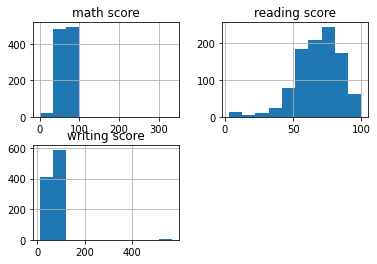

In [197]:
df.hist()
plt.show()

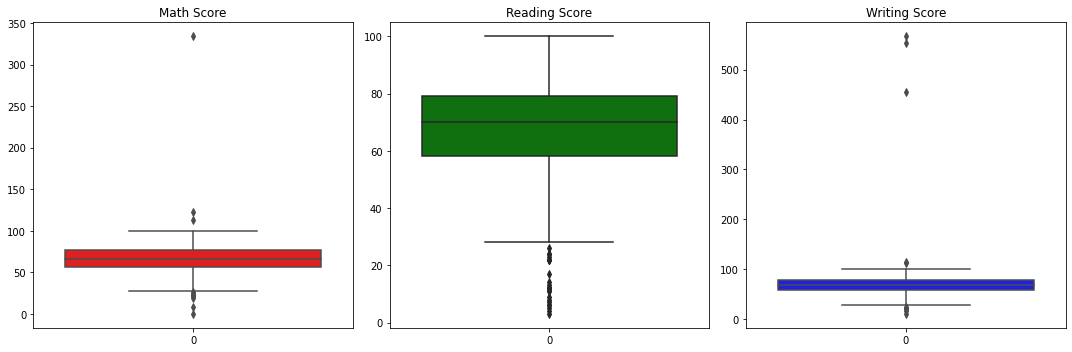

In [198]:
#Boxplots
fig,axs = plt.subplots(1,3,figsize=(15,5)) #15,5 - width,height in inch , 1->row,3->col

sns.boxplot(df['math score'],ax=axs[0],color='red')
axs[0].set_title("Math Score")

sns.boxplot(df['reading score'],ax=axs[1],color='green')
axs[1].set_title("Reading Score")

sns.boxplot(df['writing score'],ax=axs[2],color='blue')
axs[2].set_title("Writing Score")

plt.tight_layout()
plt.show()

In [199]:
# Removing outliers
#Math Score
Q1 = df['math score'].quantile(0.25)
Q3 = df['math score'].quantile(0.75)

IQR = Q3 - Q1 # Interquartile range

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR


df = df[ (df['math score'] > lower) & (df['math score'] < upper) ]

#Reading Score
Q1 = df['reading score'].quantile(0.25)
Q3 = df['reading score'].quantile(0.75)

IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df = df[(df['reading score'] > lower) & (df['reading score'] < upper)]

#Writing Score
Q1 = df['writing score'].quantile(0.25)
Q3 = df['writing score'].quantile(0.75)

IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR 

df = df[ (df['writing score'] > lower) & (df['writing score'] < upper)]

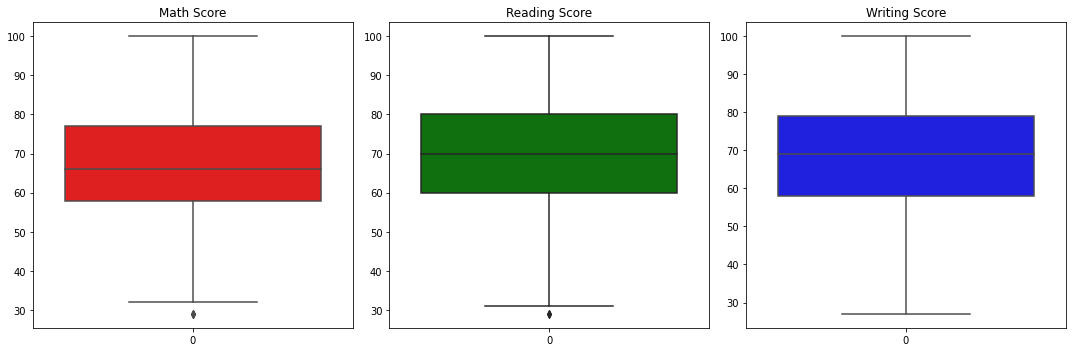

In [200]:
fig,axs = plt.subplots(1,3,figsize=(15,5))

sns.boxplot(df['math score'],ax=axs[0],color='red')
axs[0].set_title("Math Score")

sns.boxplot(df['reading score'],ax=axs[1],color='green')
axs[1].set_title("Reading Score")

sns.boxplot(df['writing score'],ax=axs[2],color='blue')
axs[2].set_title("Writing Score")

plt.tight_layout()
plt.show()

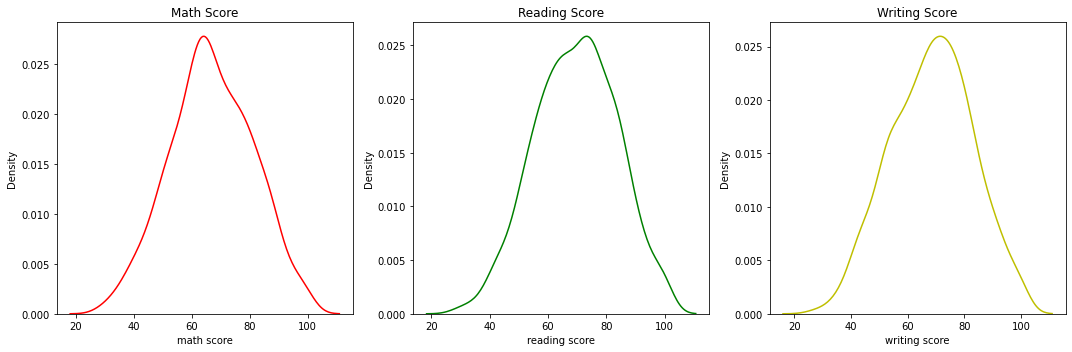

In [201]:
fig,axs = plt.subplots(1,3,figsize=(15,5))

sns.kdeplot(df['math score'],ax=axs[0],color='r')
axs[0].set_title('Math Score')

sns.kdeplot(df['reading score'],ax=axs[1],color='g')
axs[1].set_title('Reading Score')

sns.kdeplot(df['writing score'],ax=axs[2],color='y')
axs[2].set_title("Writing Score")

plt.tight_layout()
plt.show()

In [202]:
print("Math Score")
print("SKewness Before Transformation : ",df['math score'].skew())
df['math score'] = np.sqrt(df['math score'])
print("SKewness After Transformation : ",df['math score'].skew())

Math Score
SKewness Before Transformation :  -0.030393193480139805
SKewness After Transformation :  -0.3129780604828321


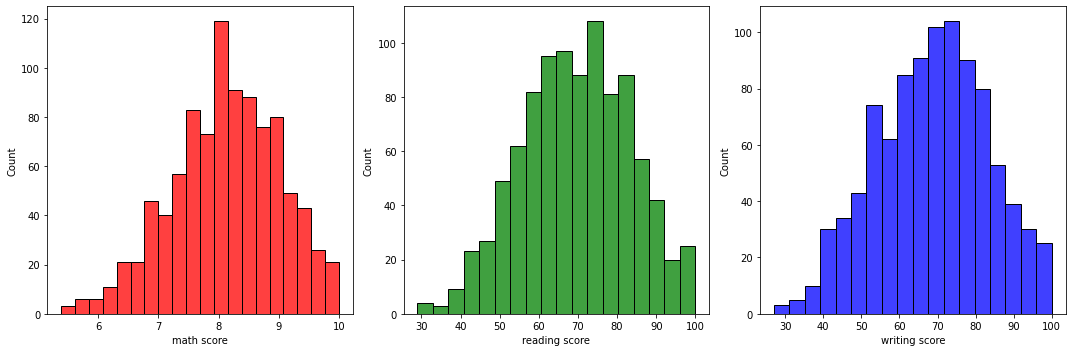

In [204]:
fig, axs = plt.subplots(1,3, figsize=(15,5))

sns.histplot(df['math score'], ax=axs[0], color='r')
sns.histplot(df['reading score'], ax=axs[1], color='g')
sns.histplot(df['writing score'], ax=axs[2], color='b')

plt.tight_layout()
plt.show()